## Transfer Learning VGG16 - Tomato Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Data_assignment/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Data_assignment/test'

In [4]:
IMAGE_SIZE +[3]

[224, 224, 3]

In [6]:
 #Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 2s 0us/step


In [7]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [8]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/Data_assignment/train/*')

In [9]:
folders

['/content/drive/MyDrive/Colab Notebooks/Data_assignment/train/PNEUMONIA',
 '/content/drive/MyDrive/Colab Notebooks/Data_assignment/train/NORMAL']

In [10]:
x = Flatten()(vgg19.output)

In [11]:
len(folders)

2

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [13]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Data_assignment/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [18]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Data_assignment/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [19]:
len(test_set)

20

In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
163/163 [==============================] - 3686s 23s/step - loss: 0.2414 - accuracy: 0.9086 - val_loss: 0.2827 - val_accuracy: 0.8990
Epoch 2/20
163/163 [==============================] - 129s 790ms/step - loss: 0.1430 - accuracy: 0.9448 - val_loss: 0.3177 - val_accuracy: 0.8862
Epoch 3/20
163/163 [==============================] - 128s 783ms/step - loss: 0.1150 - accuracy: 0.9548 - val_loss: 0.4163 - val_accuracy: 0.8782
Epoch 4/20
163/163 [==============================] - 127s 777ms/step - loss: 0.1565 - accuracy: 0.9463 - val_loss: 0.4647 - val_accuracy: 0.8894
Epoch 5/20
163/163 [==============================] - 126s 770ms/step - loss: 0.1479 - accuracy: 0.9503 - val_loss: 0.4633 - val_accuracy: 0.8878
Epoch 6/20
163/163 [==============================] - 125s 764ms/step - loss: 0.1053 - accuracy: 0.9603 - val_loss: 0.3770 - val_accuracy: 0.8782
Epoch 7/20
163/163 [=============================

In [21]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('lungs_disease.h5')

In [22]:
from tensorflow.keras.models import load_model
model = load_model('lungs_disease.h5')

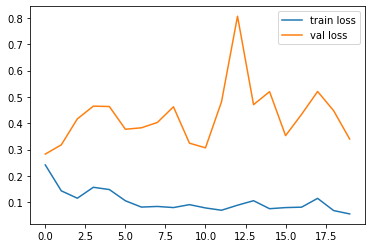

<Figure size 432x288 with 0 Axes>

In [23]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

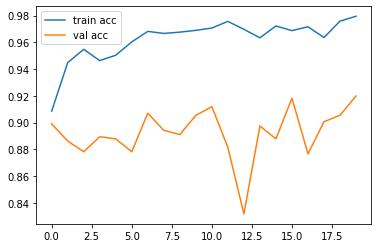

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
# Prediction
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,

In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Data_assignment/test/PNEUMONIA/person100_bacteria_478.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [27]:
result

array([[6.8413641e-04, 9.9931586e-01]], dtype=float32)

In [28]:
pred = np.argmax(result,axis=1)
pred

array([1])

In [29]:
if pred==0:
    print("Normal")
else:
    print("Pneumonia!!")

Pneumonia!!
